# A Brief Overview of ANN

Open in Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/ts2024/blob/main/09-ANN.ipynb)

## Introduction

Until now he have studied the ARIMA class of models for time series forecasting. In this notebook we will show how artificial neural networks (ANN) can be used for time series forecasting. For a demonstration, we will use the `pytorch` library to implement a couple of simple neural networks for time series forecasting.

Before we turn to time series modeling, let's briefly discuss the basics of ANN for regression and we will start with the linear regression model that we studied in econometrics.

## Linear Regression

In linear regression we have a set of predictor variables $x_1$, $x_2$, ..., $x_p$ and a target variable $y$. We try to approximate $y$ for a set of $n$ observations. 



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import torch

n = 2000

dt = pd.DataFrame({
    'x1': np.random.randn(n),
    'x2': np.random.randn(n),
})

dt["y"] = 5 + 2 * dt["x1"] - 3 * dt["x1"]**2 + 3 * dt["x2"] + np.random.randn(n)

dt = dt.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

dt.head()

,x1,x2,y
0,0.724499,0.446104,0.618577
1,0.261465,0.334354,0.571054
2,0.294893,0.802052,0.795595
3,0.328909,0.600445,0.746759
4,0.593407,0.478099,0.773034


In [7]:
dt.describe()

,x1,x2,y
count,2000.000000,2000.000000,2000.000000
mean,0.440512,0.515948,0.751801
std,0.137878,0.155683,0.102166
min,0.000000,0.000000,0.000000
25%,0.344818,0.409958,0.707410
50%,0.438739,0.516208,0.765536
75%,0.539029,0.619689,0.819006
max,1.000000,1.000000,1.000000


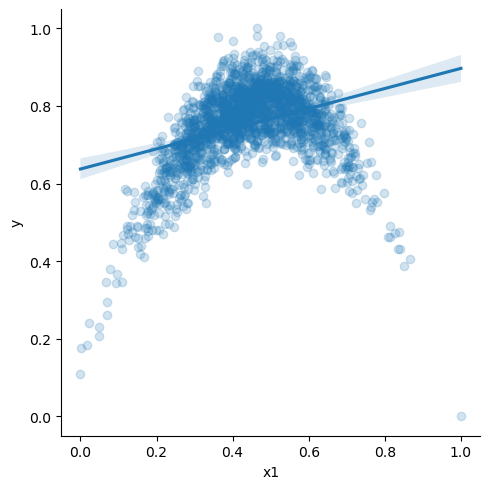

In [10]:
# Plot x1 and y and overlay the regression line

sns.lmplot(x='x1', y='y', data=dt, scatter_kws={"alpha":0.2})
plt.show()

In econometrics we have written the linear regression model as for each observation $i = 1,\ldots,n$:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i
$$

Where $\beta_0$ is the intercept, $\beta_1, \ldots, \beta_p$ are the coefficients of the predictors, and $\epsilon_i$ is the error term for observation $i$. We can also write it more compactly as:

$$
y = X\beta + \epsilon
$$

Where $y$ is a vector of length $n$ and $\beta_0$ and $\beta_1$ are scalar parameters to be estimated, $x_1$ is a vector of length $n$, and $\epsilon$ is a vector of error terms of the same length. We can try to find the best values of $\beta_0$ and $\beta_1$ so that the predicted values of $y$ are as close as possible to the actual values of $y$.

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i}
$$

or 

$$
\hat{y} = X\hat{\beta}
$$

in matrix form. Here $\hat{y}$ is the predicted value of $y$ and $\hat{\beta}$ is the estimated vector of parameters.

If we are looking for "best" values of $\beta$ we must specify what good and bad means and this is the role of the loss function. The most common loss function for regression is the mean squared error (MSE) which is defined as:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

So the goal is to find the values of $\beta$ that minimize the MSE. We have actually done this in econometrics using the OLS method which resulted in the following formula for $\hat{\beta}$:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

where $X^T$ is the transpose of $X$ and $(X^TX)^{-1}$ is the inverse of the matrix product of $X^T$ and $X$.


In [4]:
# The first ten rows of the data

dt.head(n = 10)

,x1,x2,y
0,0.492937,0.739112,0.860844
1,0.600174,0.548167,0.777386
2,0.563991,0.523758,0.827424
3,0.755486,0.402978,0.550062
4,0.681538,0.490491,0.668675
5,0.463208,0.292596,0.753548
6,0.482839,0.540559,0.812348
7,0.485506,0.654736,0.829487
8,0.319296,0.328001,0.631914
9,0.582837,0.415406,0.770074


In [5]:

y, X = dmatrices('y ~ x1', dt[:10])

print("The feature matrix X is:")
print(X)

# Initialize the beta vector

beta = np.array([0.1, 0.1])
print("The beta1 vector is:")
print(beta)

y_hat = X.dot(beta)

print("The predicted values are:")

print(y_hat)

The feature matrix X is:
[[1.         0.49293704]
 [1.         0.60017429]
 [1.         0.56399138]
 [1.         0.75548606]
 [1.         0.68153823]
 [1.         0.46320768]
 [1.         0.4828391 ]
 [1.         0.4855061 ]
 [1.         0.31929623]
 [1.         0.58283742]]
The beta1 vector is:
[0.1 0.1]
The predicted values are:
[0.1492937  0.16001743 0.15639914 0.17554861 0.16815382 0.14632077
 0.14828391 0.14855061 0.13192962 0.15828374]


In [6]:
# Calculate the residuals

residuals = y.squeeze() - y_hat

print("The residuals are:")
print(residuals)

print("The mean squared error is:", np.mean(residuals**2))

The residuals are:
[0.71155053 0.61736841 0.67102507 0.37451385 0.50052135 0.60722744
 0.66406387 0.68093624 0.49998443 0.61179035]
The mean squared error is: 0.3626156811281431


In [8]:
# Or by using a dedicated library (similar to the lm function in R)

import statsmodels.api as sm

model = sm.OLS(y, X)

result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.041
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.337
Time:                        12:49:33   Log-Likelihood:                 9.9665
No. Observations:                  10   AIC:                            -15.93
Df Residuals:                       8   BIC:                            -15.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8984      0.151      5.966      0.0

/home/amarov/miniconda3/envs/ts2024/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Gradient Descent

There is also a more general way to find the best values of $\beta$ and that is by using the gradient descent algorithm. The idea is to start with some initial values of $\beta$ and then iteratively update the values of $\beta$ in the direction of the negative gradient of the loss function. The gradient of the loss function is the vector of partial derivatives of the loss function with respect to each parameter.

Consider first a very simple function of one variable:

$$
f(x) = x^2 - 2x + 1
$$

Its derivative is:

$$
f'(x) = 2x - 2
$$

and its minimum is at $x = -1$ (where the derivative is zero). We can find this minimum by starting at some initial value of $x$ and then iteratively updating $x$ in the direction of the negative gradient of $f(x)$:

$$
x_{t+1} = x_t - \eta f'(x_t)
$$

where $\eta$ a parameter that controls the speed of learning.


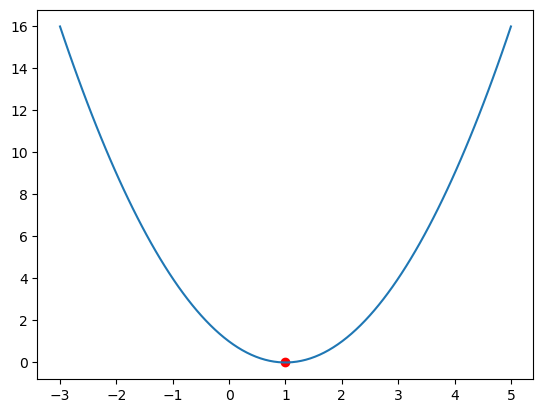

In [9]:
# Plot the minimum of the function

x = np.linspace(-3, 5, 100)

y = x**2 - 2 * x + 1

plt.plot(x, y)
plt.scatter(1, 0, color='red')
plt.show()


Step 0 x: 4 y: 9 gradient: 6
Step 1 x: 3.4 y: 5.759999999999999 gradient: 4.8
Step 2 x: 2.92 y: 3.686399999999999 gradient: 3.84
Step 3 x: 2.536 y: 2.3592960000000005 gradient: 3.072
Step 4 x: 2.2288 y: 1.5099494400000006 gradient: 2.4576000000000002
Step 5 x: 1.9830400000000001 y: 0.9663676416000002 gradient: 1.9660800000000003
Step 6 x: 1.786432 y: 0.6184752906240001 gradient: 1.572864
Step 7 x: 1.6291456 y: 0.3958241859993601 gradient: 1.2582912
Step 8 x: 1.50331648 y: 0.2533274790395903 gradient: 1.0066329600000001
Step 9 x: 1.402653184 y: 0.16212958658533783 gradient: 0.8053063680000001


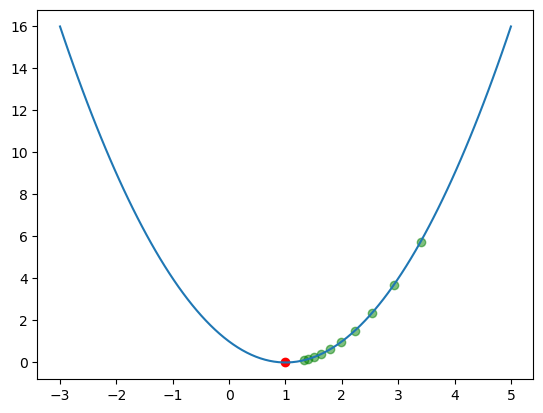

In [10]:
# Plot the gradient descent steps

x = np.linspace(-3, 5, 100)

y = x**2 - 2 * x + 1
d_y = 2 * x - 2

plt.plot(x, y)
plt.scatter(1, 0, color='red')

x = 4

for i in range(10):
    print("Step", i, "x:", x, "y:", x**2 - 2 * x + 1, "gradient:", 2 * x - 2)
    x = x - 0.1 * (2 * x - 2)    
    plt.scatter(x, x**2 - 2 * x + 1, color='green', alpha=0.5)
    

The same works for functions of multiple variables. The gradient of a function of multiple variables is a vector of partial derivatives. For example, consider the function:

$$
f(x_1, x_2) = x_1^2 + x_2^2
$$

Its gradient is:

$$
\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix}
$$

and its minimum is at $x_1 = 0$ and $x_2 = 0$. We can find this minimum by starting at some initial values of $x_1$ and $x_2$ and then iteratively updating $x_1$ and $x_2$ in the direction of the negative gradient of $f(x_1, x_2)$:

$$
x_{1,t+1} = x_{1,t} - \eta \frac{\partial f}{\partial x_1}
$$

$$
x_{2,t+1} = x_{2,t} - \eta \frac{\partial f}{\partial x_2}
$$

where $\eta$ a parameter that controls the speed of learning.

Step 0 x1: 4 x2: 4 f: 32 gradient: [8 8]
Step 1 x1: 3.2 x2: 3.2 f: 20.480000000000004 gradient: [6.4 6.4]
Step 2 x1: 2.56 x2: 2.56 f: 13.1072 gradient: [5.12 5.12]
Step 3 x1: 2.048 x2: 2.048 f: 8.388608 gradient: [4.096 4.096]
Step 4 x1: 1.6384 x2: 1.6384 f: 5.36870912 gradient: [3.2768 3.2768]
Step 5 x1: 1.31072 x2: 1.31072 f: 3.4359738368000006 gradient: [2.62144 2.62144]
Step 6 x1: 1.0485760000000002 x2: 1.0485760000000002 f: 2.199023255552001 gradient: [2.097152 2.097152]
Step 7 x1: 0.8388608000000002 x2: 0.8388608000000002 f: 1.4073748835532807 gradient: [1.6777216 1.6777216]
Step 8 x1: 0.6710886400000001 x2: 0.6710886400000001 f: 0.9007199254740995 gradient: [1.34217728 1.34217728]
Step 9 x1: 0.5368709120000001 x2: 0.5368709120000001 f: 0.5764607523034238 gradient: [1.07374182 1.07374182]


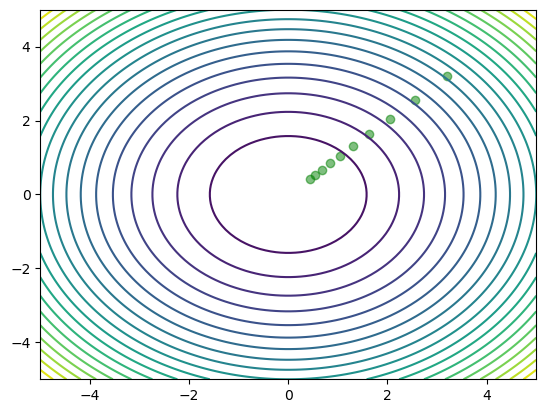

In [11]:
# Plot the steps of the gradient descent algorithm for the function of two variables

def f(x1, x2):
    return x1**2 + x2**2

def grad_f(x1, x2):
    return np.array([2 * x1, 2 * x2])

x1 = 4
x2 = 4

for i in range(10):
    print("Step", i, "x1:", x1, "x2:", x2, "f:", f(x1, x2), "gradient:", grad_f(x1, x2))
    x1 = x1 - 0.1 * grad_f(x1, x2)[0]
    x2 = x2 - 0.1 * grad_f(x1, x2)[1]
    plt.scatter(x1, x2, color='green', alpha=0.5)

# Plot the function as countour plot

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)

X1, X2 = np.meshgrid(x1, x2)

Y = X1**2 + X2**2

plt.contour(X1, X2, Y, levels=20)


## The Linear Regression as a Neural Network

Artificial neural networks are inspired by the way the human brain works and are a network of interconnected nodes (neurons) that are organized in layers. The simplest neural network is the perceptron which consists of a single neuron.

![Perceptron with a single input](./figures/ANN/perceptron-single-input.png)

![Perceptron with two inputs](./figures/ANN/perceptron-two-inputs.png)

![Perceptron with multiple inputs](./figures/ANN/perceptron-multiple-inputs.png)

The prediction of the perceptron is simply the weighted sum of the inputs:

$$
\hat{y} = b_1 + w_1 x_1 + w_2 x_2 + \ldots + w_p x_p
$$

where $b_1$ is the bias term, $w_1, \ldots, w_p$ are the weights of the inputs, and $x_1, \ldots, x_p$ are the inputs. The perceptron can be seen as a linear regression model with a single neuron.

Note that the language here differs from the econometrics language. When we talk of bias in econometrics we mean a systematic error in the model. In neural networks, the bias is a parameter just the constant in the linear regression model.

The MSE loss function for this model is:

$$
\text{MSE}(b, w_1, w_2) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


Taking MSE as the loss function, we can find the update rule for the weights and the bias.


$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial b} & = - \frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial b} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial b} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \\
\end{align*}
$$

$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_1} & = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial w_1} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial w_1} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) x_{1,i} \\
\end{align*}
$$

$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_2} & = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial w_2} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial w_2} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) x_{2,i} \\
\end{align*}
$$

So given a learning rate $\eta$, we can update the weights and the bias as follows:

$$
b_{t+1} = b_t - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial b}
$$

$$
w_{1,t+1} = w_{1,t} - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_1}
$$

$$
w_{2,t+1} = w_{2,t} - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_2}
$$


In [23]:
b = 0.001
w1 = 0.02
w2 = -0.01
learning_rate = 0.05

for i in range(5000):
    y_hat = b + w1 * dt["x1"] + w2 * dt["x2"]
    residuals = dt["y"] - y_hat

    # Update 
    b = b - learning_rate * np.mean(- 2 * residuals)
    w1 = w1 - learning_rate * np.mean(- 2 * residuals * dt["x1"])
    w2 = w2 - learning_rate * np.mean(- 2 * residuals * dt["x2"])

    if i % 500 == 0:    
        loss = np.mean(residuals**2)
        print("Step", i, "loss:", loss)
        print("Weights", "b:", b, "w1:", w1, "w2:", w2)


Step 0 loss: 0.5078149668167401
Weights b: 0.07138966717966241 w1: 0.05622623994674816 w2: 0.024299215403763938
Step 500 loss: 0.007054848769104476
Weights b: 0.42159306751881237 w1: 0.24686223021903947 w2: 0.3464802440702737
Step 1000 loss: 0.006887475279958487
Weights b: 0.39361231554958775 w1: 0.24847588414826713 w2: 0.4029357542979685
Step 1500 loss: 0.006850688281823777
Weights b: 0.3792227374631959 w1: 0.2525489168695201 w2: 0.42849766766696845
Step 2000 loss: 0.006842206396681245
Weights b: 0.37194116397403276 w1: 0.2556347384904589 w2: 0.44033597389273826
Step 2500 loss: 0.006840203120952952
Weights b: 0.3682939075505013 w1: 0.25750944552096267 w2: 0.4459134467370383
Step 3000 loss: 0.006839724527353906
Weights b: 0.36647906301993965 w1: 0.25854903169861554 w2: 0.44857449530875226
Step 3500 loss: 0.006839609578963161
Weights b: 0.3655799121965033 w1: 0.2590989457705152 w2: 0.4498555805597418
Step 4000 loss: 0.006839581903323186
Weights b: 0.3651357086229736 w1: 0.25938205025631

In [24]:
# We can obtain the same result using OLS

ols_fit = sm.formula.ols(formula='y ~ x1 + x2', data=dt).fit()

print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     813.9
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          2.99e-259
Time:                        12:51:39   Log-Likelihood:                 2147.2
No. Observations:                2000   AIC:                            -4288.
Df Residuals:                    1997   BIC:                            -4272.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3647      0.009     40.976      0.0

In [30]:
# Torch model for the linear regression

import torch

X = torch.tensor(dt[["x1", "x2"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

linmod = torch.nn.Linear(2, 1)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(linmod.parameters(), lr=0.01)

for i in range(4000):
    optimizer.zero_grad()
    
    y_hat = linmod(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 50 == 0:
        print("Epoch", i, "Loss:", loss.item())

print("The beta values are:")
print(linmod.weight.detach().numpy())

# The bias term

print("The bias term is:")
print(linmod.bias.detach().numpy())

Epoch 0 Loss: 0.028767451643943787
Epoch 50 Loss: 0.011943990364670753
Epoch 100 Loss: 0.008408643305301666
Epoch 150 Loss: 0.007256012875586748
Epoch 200 Loss: 0.006931982934474945
Epoch 250 Loss: 0.006855627987533808
Epoch 300 Loss: 0.006841706112027168
Epoch 350 Loss: 0.00683978758752346
Epoch 400 Loss: 0.006839589215815067
Epoch 450 Loss: 0.006839573848992586
Epoch 500 Loss: 0.0068395729176700115
Epoch 550 Loss: 0.0068395729176700115
Epoch 600 Loss: 0.006839573383331299
Epoch 650 Loss: 0.0068395729176700115
Epoch 700 Loss: 0.0068395729176700115
Epoch 750 Loss: 0.0068395729176700115
Epoch 800 Loss: 0.0068395729176700115
Epoch 850 Loss: 0.0068395729176700115
Epoch 900 Loss: 0.0068395729176700115
Epoch 950 Loss: 0.0068395729176700115
Epoch 1000 Loss: 0.0068395729176700115
Epoch 1050 Loss: 0.0068395729176700115
Epoch 1100 Loss: 0.0068395729176700115
Epoch 1150 Loss: 0.0068395729176700115
Epoch 1200 Loss: 0.0068395729176700115
Epoch 1250 Loss: 0.0068395729176700115
Epoch 1300 Loss: 0.00

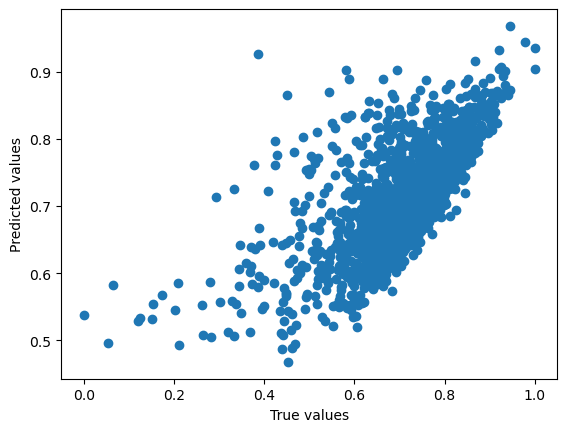

In [31]:
# It is useful to plot the predicted values against the true values

y_hat = linmod(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


Until now we have only changed the notation (instead of $\beta_1$ and $\beta_0$ we have $w_1, \ldots, w_1$ and $b_1$) but the model is the same. The only different thing is that we used gradient descent to find the best values of $w_1$ and $b_1$ instead of the OLS method.

Things get more interesting when we add more layers to the network.

![Neural network with two nodes in one hidden layer, single input](./figures/ANN/ann-hidden-layer-single-input.png)

The graphic visualizes the following mathematical model:

$$
\begin{align*}
z_1 &= b_1 + w^{h}_{1} x_1 \\
z_2 &= b_2 + w^{h}_{2} x_1 \\
h_1 &= \sigma(z_1) \\
h_2 &= \sigma(z_2) \\
\hat{y} &=  b + w^{o}_1 h_1 + w^{o}_2 h_2
\end{align*}
$$

where $z_1$ and $z_2$ are the weighted sums of the inputs, $h_1$ and $h_2$ are the outputs of the hidden layer, $\sigma$ is the activation function, and $\hat{y}$ is the prediction of the network. The activation function is a non-linear function that introduces non-linearity to the model. Here we have used the sigmoid function as the activation function. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

and maps the real numbers to the interval $(0, 1)$. The sigmoid function is used to introduce non-linearity to the model. If we used a linear activation function the model would be equivalent to a linear regression model.

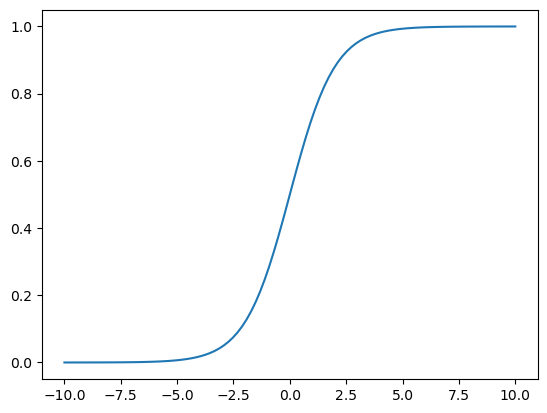

In [16]:
# Plot the sigmoid function

x = np.linspace(-10, 10, 100)

y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()


Epoch 0 Loss: 1.3992706537246704
Epoch 1000 Loss: 0.005062868818640709
Epoch 2000 Loss: 0.004104066174477339
Epoch 3000 Loss: 0.004089646972715855
Epoch 4000 Loss: 0.004077751189470291
Epoch 5000 Loss: 0.004628055263310671
Epoch 6000 Loss: 0.004063379485160112
Epoch 7000 Loss: 0.00406102929264307
Epoch 8000 Loss: 0.004060092847794294
Epoch 9000 Loss: 0.0040596178732812405


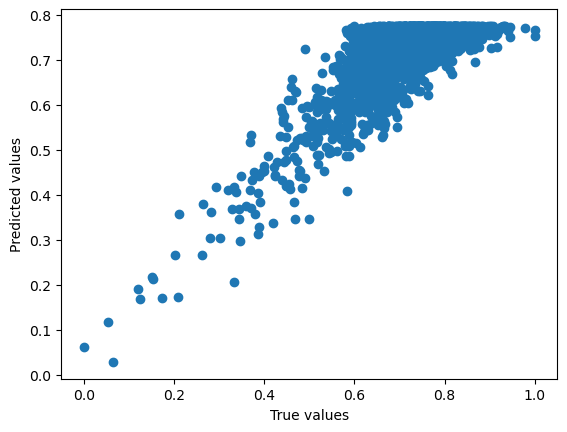

In [32]:
# Fit the model using pytorch

nn1 = torch.nn.Sequential(
    torch.nn.Linear(1, 7),
    torch.nn.Tanh(),
    torch.nn.Linear(7, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(nn1.parameters(), lr=0.03)

X = torch.tensor(dt[["x1"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

for i in range(10000):
    optimizer.zero_grad()
    
    y_hat = nn1(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 1000 == 0:
        print("Epoch", i, "Loss:", loss.item())

# Plot the predicted values against the true values

y_hat = nn1(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


In [33]:
# Print the weights and biases

print("The weights are:")
print(nn1[0].weight.detach().numpy())
print("The biases are:")
print(nn1[0].bias.detach().numpy())

print("The weights are:")
print(nn1[2].weight.detach().numpy())
print("The biases are:")
print(nn1[2].bias.detach().numpy())

The weights are:
[[-2.9093904 ]
 [-0.0169286 ]
 [-0.23404709]
 [ 2.4000177 ]
 [-0.9496508 ]
 [-0.21944492]
 [ 2.1170573 ]]
The biases are:
[ 2.8901927  -0.4320543  -0.66686195  0.2035239   0.48529235 -0.97494376
  0.08814303]
The weights are:
[[ 0.6362737   0.17681874  0.39473006  0.71667033 -0.03528064  0.37095654
   0.4700643 ]]
The biases are:
[-0.19296005]


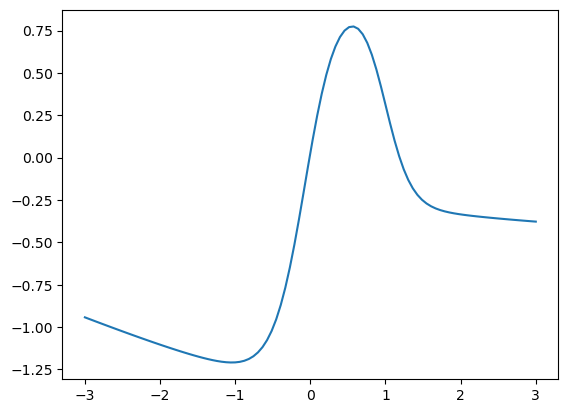

In [34]:
# Plot the prediction of the model

x = np.linspace(-3, 3, 100)

X = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)

y = nn1(X).detach().numpy()

plt.plot(x, y)
plt.show()


We can extend the mathematical model to handle two or more inputs:

![One hidden layer, two inputs](./figures/ANN/ann-hidden-layer-two-inputs.png)

Epoch 0 Loss: 0.630882740020752
Epoch 1000 Loss: 0.004821246489882469


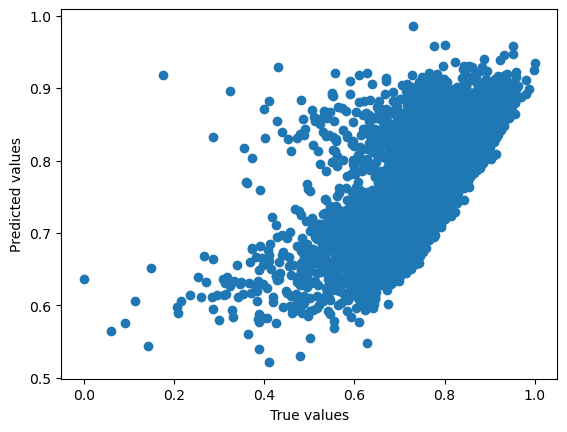

In [181]:
# Fit the model using pytorch

nn2 = torch.nn.Sequential(
    torch.nn.Linear(2, 9),
    torch.nn.Sigmoid(),
    torch.nn.Linear(9, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(nn2.parameters(), lr=0.01)

X = torch.tensor(dt[["x1", "x2"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

for i in range(1500):
    optimizer.zero_grad()
    
    y_hat = nn2(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 1000 == 0:
        print("Epoch", i, "Loss:", loss.item())

# Plot the predicted values against the true values

y_hat = nn2(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

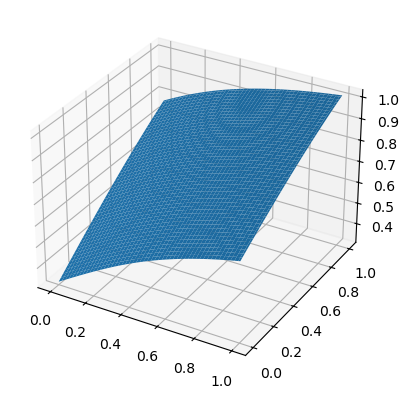

In [182]:
# Plot the prediction of the model for the two features

x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

X1, X2 = np.meshgrid(x1, x2)

X = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

y = nn2(X).detach().numpy().reshape(100, 100)

# Visualize in 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y)
plt.show()


## Time series forecasting with ANN

We can use the same neural network architecture that we used for regression for time series forecasting. The only difference is that we use a time series as input instead of a set of predictors.

Let's say that we want to forecast the value of a time series $y_t$ at time $t$ using the values of the time series at times $t-1, t-2, \ldots, t-p$. We can use the following neural network architecture:


Imagine a very simple time series of length 8 and let's say that we want to forecast the value of the time using the previous three values of the time series. The time series is:

/Markdown table for the following number with y in the header


| $y_1$ | $y_2$ | $y_3$ | $y_4$ | $y_5$ | $y_6$ | $y_7$ | $y_8$ |
|-----|-----|-----|-----|-----|-----|-----|-----|
|  2  |  4  |  6  |  8  | 10  | 12  | 14  | 16  |

How many training samples can we extract from this time series? Starting from the first value of the time series we can extract the following training samples:

$$
\begin{align*}
[y_1, y_2, y_3] & \rightarrow y_4 \\
[y_2, y_3, y_4] & \rightarrow y_5 \\
[y_3, y_4, y_5] & \rightarrow y_6 \\
[y_4, y_5, y_6] & \rightarrow y_7 \\
[y_5, y_6, y_7] & \rightarrow y_8 \\
\end{align*}
$$

In general, there are $T - L + 1$ sliding windows of length $L$ for a time series of length $T$. In our case, there are $8 - 3 + 1 = 6$ sliding windows of length 3. However, we cannot use the last window ($y_6, y_7, y_8$) as a training sample because we do not have the target value for this window ($y_9$). So we have only 5 training samples.

The input matrix $X$ and the target vector $y$ for the training samples are:

$$
X = \begin{bmatrix}
y_1 & y_2 & y_3 \\
y_2 & y_3 & y_4 \\
y_3 & y_4 & y_5 \\
y_4 & y_5 & y_6 \\
y_5 & y_6 & y_7 \\
\end{bmatrix}

\rightarrow

y = \begin{bmatrix}
y_4 \\
y_5 \\
y_6 \\
y_7 \\
y_8 \\
\end{bmatrix}
$$

and with the concrete values:

$$
X = \begin{bmatrix}
2 & 4 & 6 \\
4 & 6 & 8 \\
6 & 8 & 10 \\
8 & 10 & 12 \\
10 & 12 & 14 \\
\end{bmatrix}
\rightarrow
y = \begin{bmatrix}
8 \\
10 \\
12 \\
14 \\
16 \\
\end{bmatrix}
$$





